### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Задание 1
Загрузка датасета

In [2]:
df = pd.read_csv("./data/iris.csv")
df.head() # Вывод первых 5-ти записей для проверки корректности импорта

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Задание 2
Посчитайте основные статистики для каждого числового столбца: среднее, минимальное, максимальное значения.

In [3]:
df.describe().loc[["mean", "min", "max"]]

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
min,4.300000,2.000,1.000000,0.100000
max,7.900000,4.400,6.900000,2.500000


Пояснение:  
**mean** - среднее значение  
**min** - минимальное значение  
**max** - максимальное значение  

### Задание 3
Отсортируйте данные по длине лепестков (колонка PetalLength) в порядке убывания.

In [4]:
df = df.sort_values(by="petal_length", ascending=True)
df

,sepal_length,sepal_width,petal_length,petal_width,variety
22,4.6,3.6,1.0,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica


### Задание 4
Постройте гистограммы для всех числовых признаков (длины и ширины чашелистиков и лепестков).

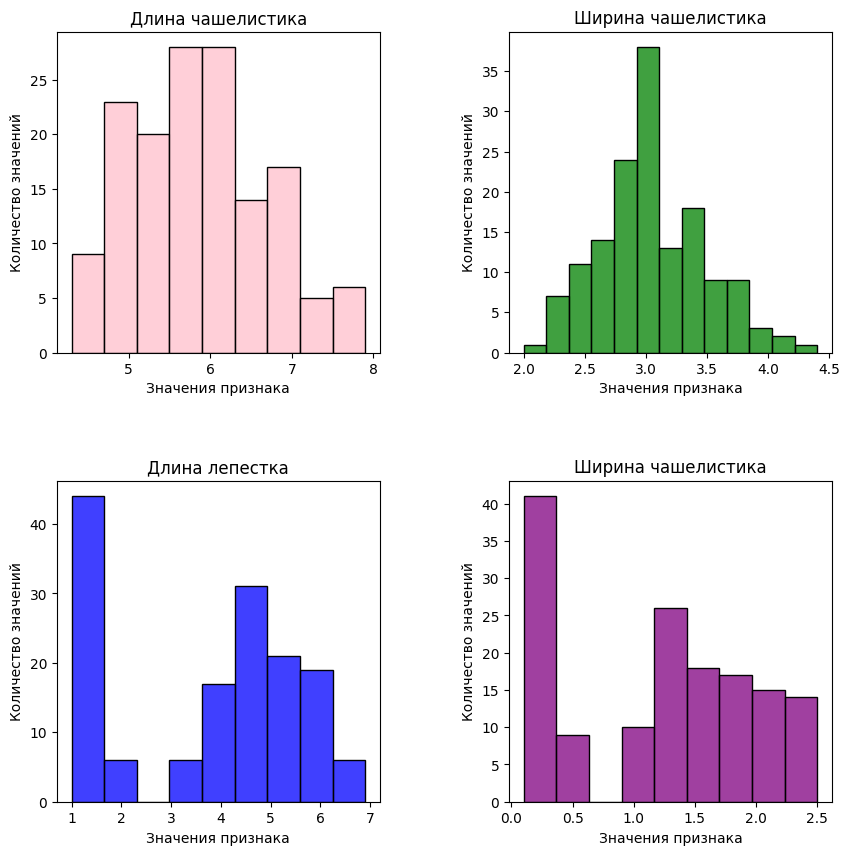

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.subplots_adjust(hspace = 0.4, wspace= 0.4)

sns.histplot(df.sepal_length, ax=ax[0][0], color="pink")
sns.histplot(df.sepal_width, ax=ax[0][1], color="green")
sns.histplot(df.petal_length, ax=ax[1][0], color="blue")
sns.histplot(df.petal_width, ax=ax[1][1], color="purple")

ax[0][0].set_title("Длина чашелистика")
ax[0][1].set_title("Ширина чашелистика")
ax[1][0].set_title("Длина лепестка")
ax[1][1].set_title("Ширина чашелистика")

for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel("Значения признака")
        ax[i][j].set_ylabel("Количество значений")


### Задание 5
Отфильтруйте данные, оставив только вид Iris-virginica, и создайте отдельную гистограмму для длины чашелистиков (SepalLength).

Text(0, 0.5, 'Количество значений')

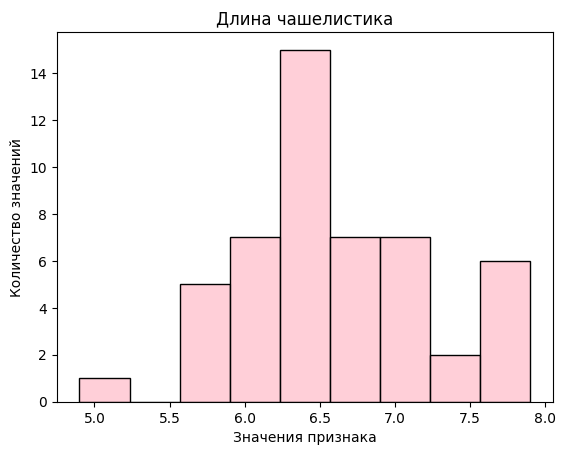

In [6]:
virginica = df.loc[df.variety == "Iris-virginica",:]

sns.histplot(virginica.sepal_length, color="pink")
plt.title("Длина чашелистика")
plt.xlabel("Значения признака")
plt.ylabel("Количество значений")

### Задание 6
Отфильтруйте строки, где длина чашелистиков больше 6.0 и ширина лепестков меньше 1.5.

In [7]:
df_filtered = df.loc[(df.sepal_length > 6.0) & (df.petal_width < 1.5),:]
print(f"Минимальная длинна чашелистика после фильтрации: {df_filtered.sepal_length.min():.01f}")
print(f"Максимальная ширина лепестка после фильтрации: {df_filtered.petal_width.max():.01f}")

Минимальная длинна чашелистика после фильтрации: 6.1
Максимальная ширина лепестка после фильтрации: 1.4


### Задание 7
Измените форму таблицы так, чтобы для каждого вида ириса был столбец с максимальной и минимальной длиной чашелистиков.

In [8]:
df_grouped = df.groupby('variety')['sepal_length'].agg(['min', 'max'])
df_grouped

,min,max
variety,,
Iris-setosa,4.3,5.8
Iris-versicolor,4.9,7.0
Iris-virginica,4.9,7.9
